<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías necesarias:**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# **1.0 Análisis del data frame**

# **1. Leer el data frame en formato csv.**

In [84]:
path = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv'
df = pd.read_csv(path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# **2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas.**

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [86]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [87]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [88]:
# Eliminando valores nulos/informaciòn innecesaria
df =df.dropna()

# **3. Determinar los elementos únicos dentro de la columna ocean_proximity.**

In [89]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# **4. Para las columnas**

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

**Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.**

In [90]:
promedio = df.groupby('ocean_proximity').mean()
promedio

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.848642,34.560734,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,-119.733085,36.731806,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.261035,37.801304,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,-119.329836,34.736065,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


In [91]:
df1 = promedio.drop(columns=['longitude', 'latitude'], axis=1)
df1

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


# **5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.**

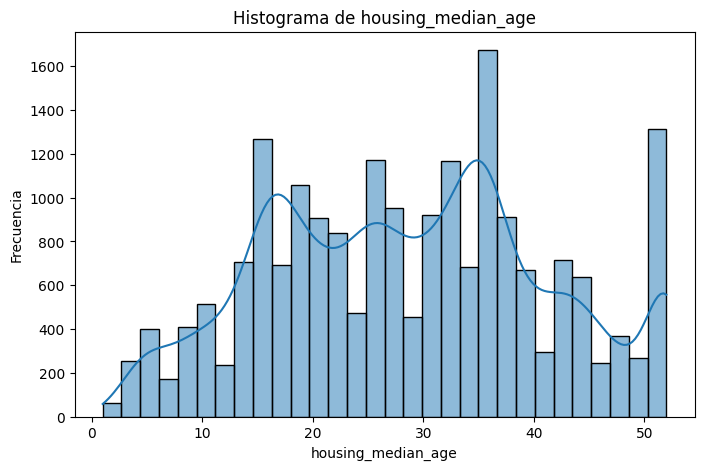

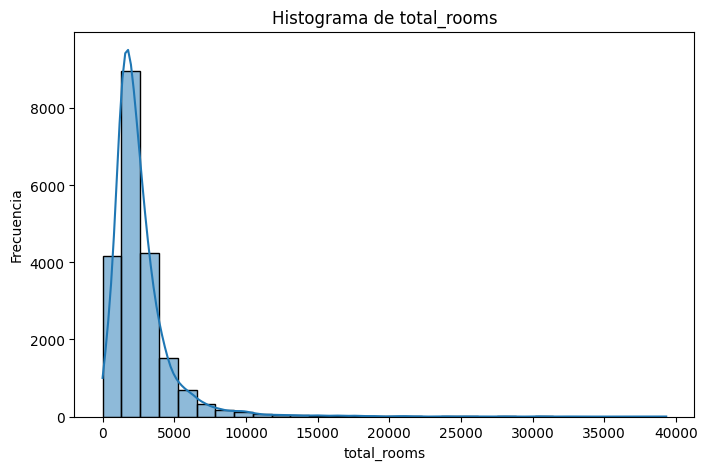

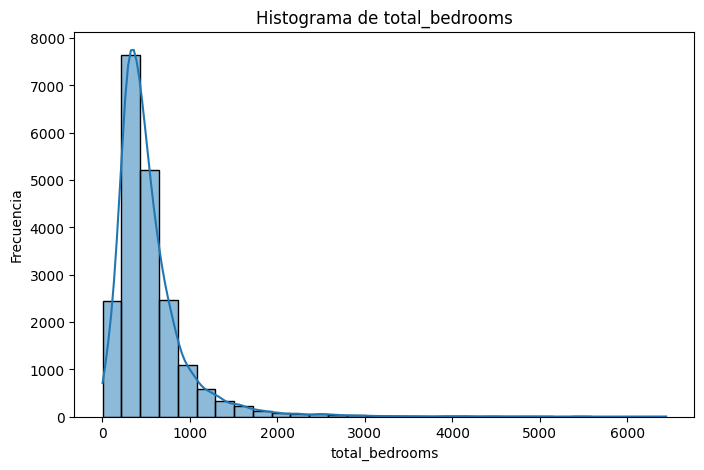

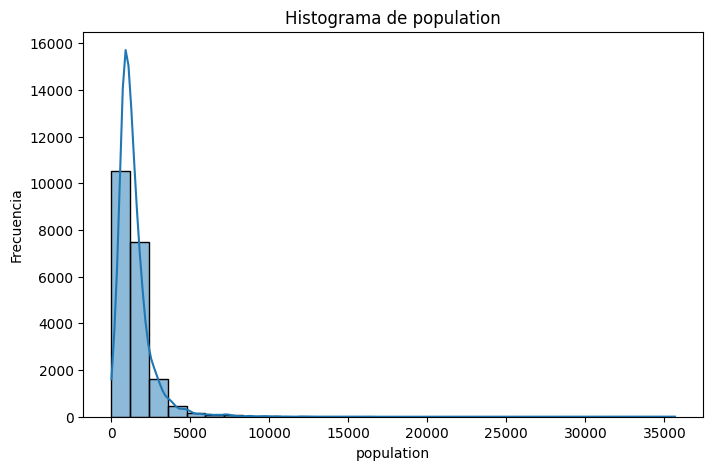

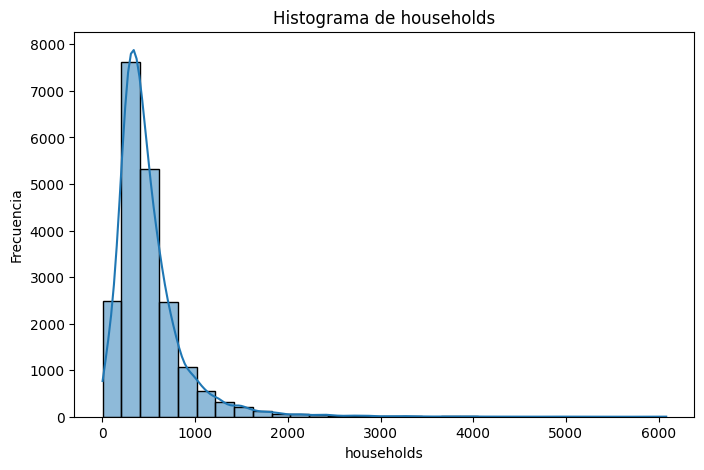

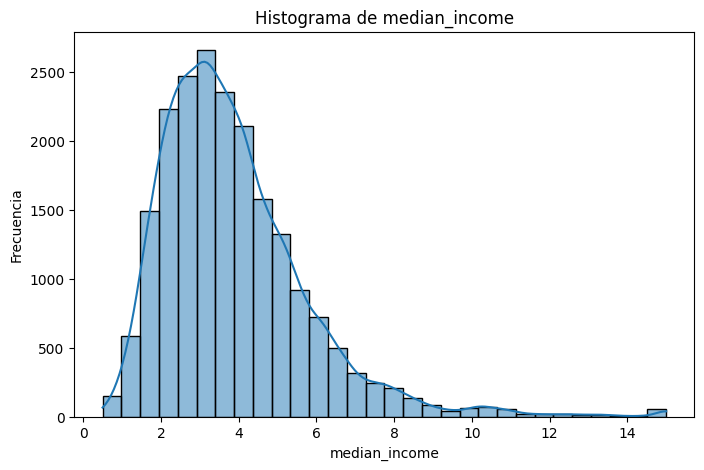

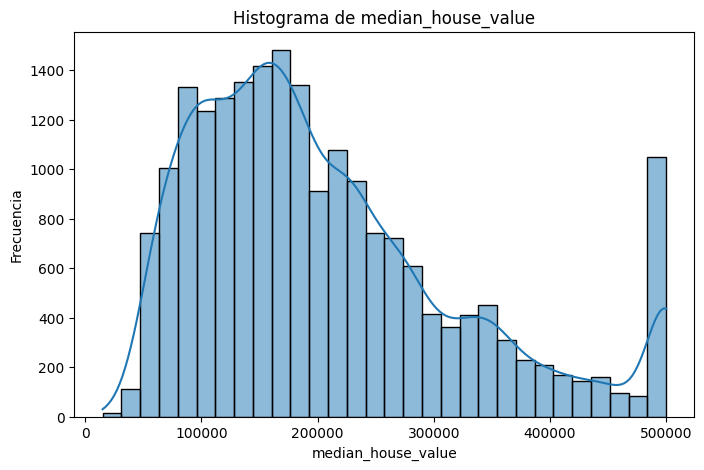

In [92]:
# Creando los histogramas:

for column in df1.columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[column], bins=30, kde=True)
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.show()

# **6. Realiza el gráfico boxplot.**

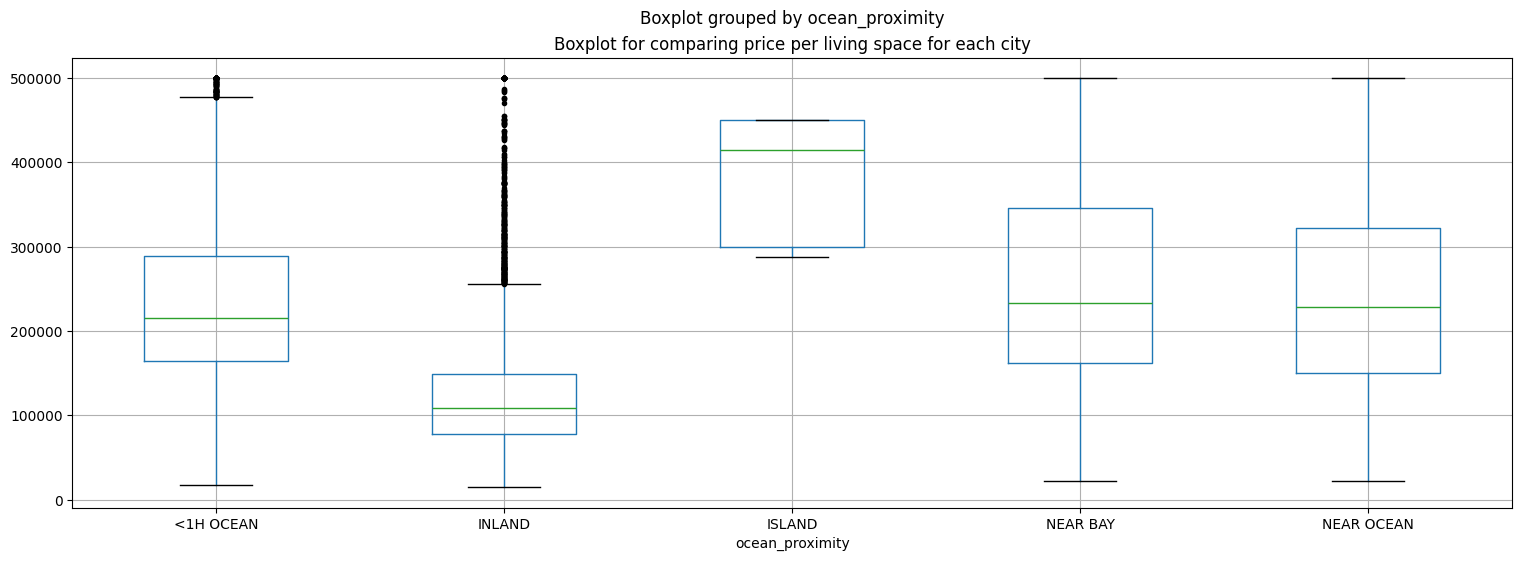

In [93]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

# **7. Determina la matrix de correlación.**

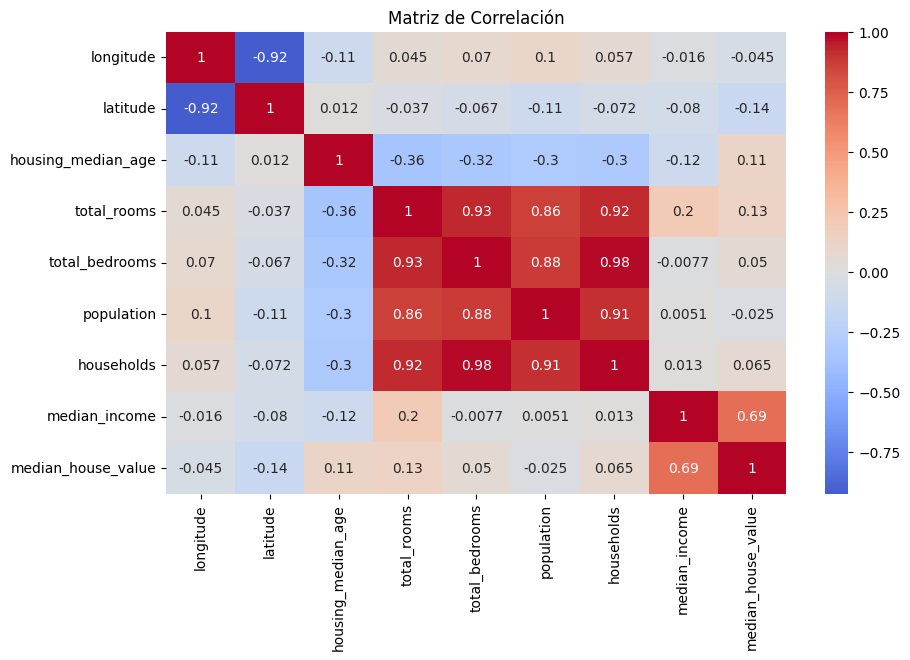

In [94]:
df_numerica = df.select_dtypes(include=[np.number])  # Volver las columnas que categóricas en variables numéricas

# Calcular la matriz de correlación
corr_matrix = df_numerica.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()

# **9. Con las columnas, realiza un grafico pairplot empleando seaborn  de python.**
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

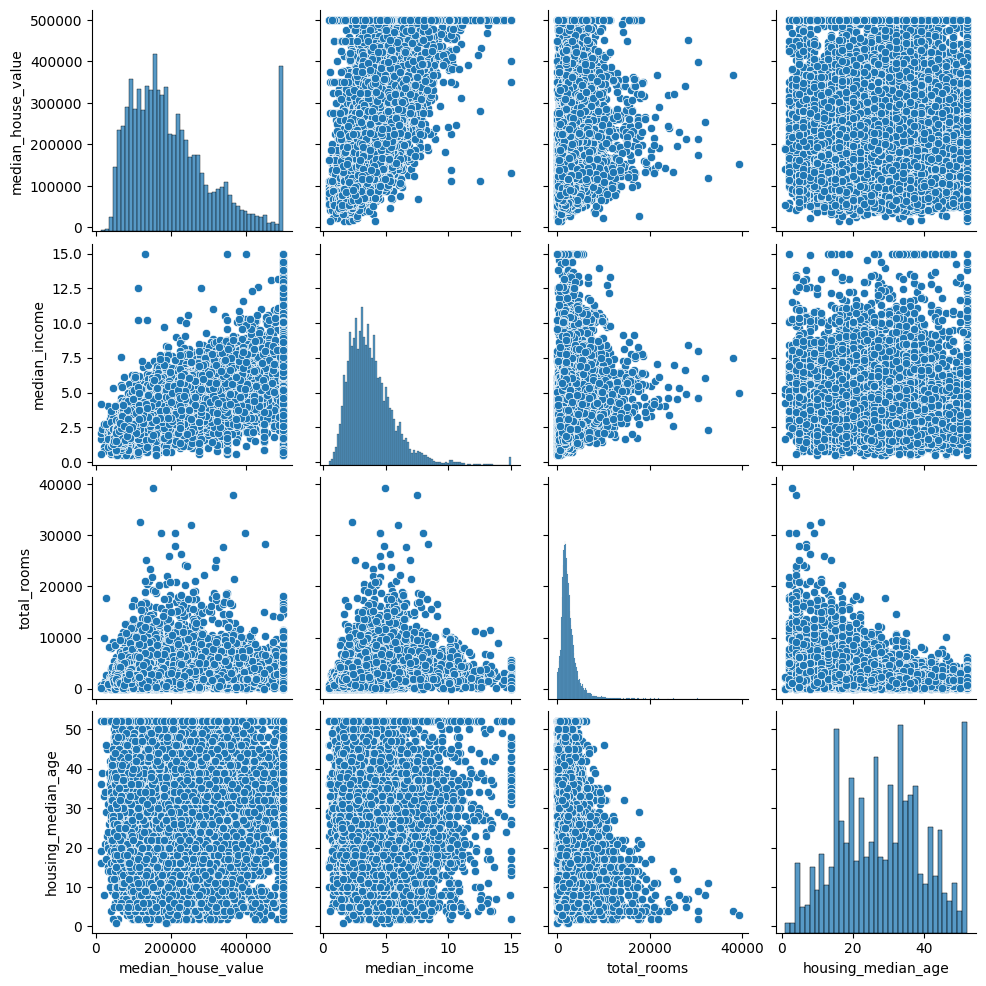

In [95]:
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
df_cols = df[cols]

# Graficando
sns.pairplot(df_cols)
plt.show()

# **10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value**

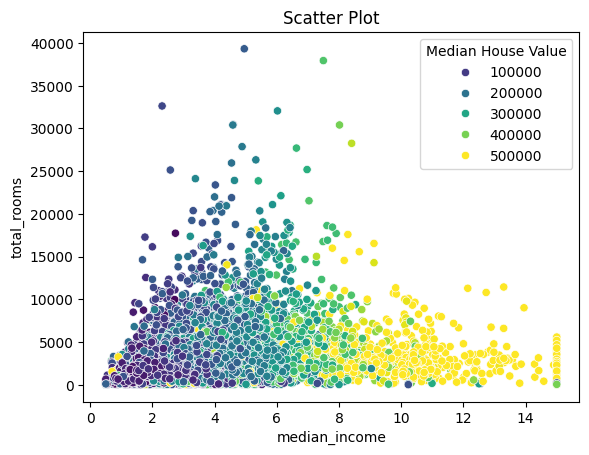

In [96]:
scatter = sns.scatterplot(data=df, x='median_income', y='total_rooms', hue='median_house_value', palette='viridis')
plt.title('Scatter Plot')
plt.legend(title='Median House Value')
plt.show()

# **11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?**


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [97]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16346
4087


La línea de código proporcionada utiliza la función train_test_split de sklearn para dividir el conjunto de datos en dos partes: una para entrenamiento (train_set) y otra para pruebas (test_set), con un 80% de los datos en el conjunto de entrenamiento y un 20% en el conjunto de prueba. El argumento random_state=42 asegura que esta división sea reproducible: cada vez que se ejecute el código, obtendrás la misma división de datos.

* ¿Es significativa la muestra que se está considerando?

Generalmente, una división del 80%-20% es una práctica común y adecuada en muchos contextos, ya que permite tener suficientes datos para entrenar el modelo mientras se reserva un subconjunto para validar su rendimiento. Sin embargo, la significancia también depende del tamaño total de tu conjunto de datos.

* ¿Qué pasa en la división de los datos?

La función train_test_split divide el conjunto de datos df en dos subconjuntos:
1. train_set: contiene el 80% de los datos y se utiliza para entrenar el modelo.

2. test_set: contiene el 20% restante y se utiliza para evaluar el modelo después de haberlo entrenado.

3. Esta división aleatoria permite simular cómo funcionará el modelo con datos no vistos y reduce el riesgo de sobreajuste (overfitting) al probarlo en datos diferentes de aquellos con los que fue entrenado.

# **12. División del dataset en grupos:**




La siguiente división puede ser realizada basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

<ipython-input-98-84440eb824c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income_cat"] = pd.cut(df["median_income"],


<Axes: >

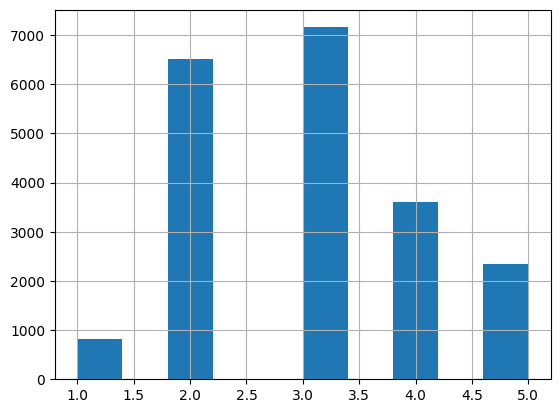

In [98]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

La forma automatica de realizar la división puede ser la siguiente:

In [99]:
df.reset_index(drop=True, inplace=True)

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

In [101]:
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

,count
income_cat,
3,0.352747
2,0.319161
4,0.175639
5,0.112138
1,0.040316


* Conclusiones sobre las proporciones:
1. Muestreo Estratificado (strat_train_set y strat_test_set): Las proporciones en estos subconjuntos deberían ser muy similares a las proporciones originales de df, ya que el muestreo estratificado se diseñó para mantener la representatividad de cada categoría en ambos subconjuntos.

2. Muestreo Aleatorio (train_set y test_set): En esta división, las proporciones pueden variar con respecto a las del conjunto completo df. Esto se debe a que la selección es aleatoria y no garantiza la misma distribución de cada categoría, especialmente si algunas categorías tienen pocas observaciones en comparación con otras.

un comparativo general puede ser estructurado de la siguente forma, analiza los errores:

In [102]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

* Análisis de los errores:
1. Rand. %error: Este valor muestra el porcentaje de error de la división aleatoria con respecto al conjunto original. Si los valores son altos, significa que la división aleatoria no mantuvo correctamente las proporciones de income_cat.
2. Strat. %error: Este valor muestra el porcentaje de error de la división estratificada con respecto al conjunto original. Valores bajos indican que la división estratificada representó bien las proporciones de income_cat.

# **13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:**

In [103]:
# Dataframe solo con columnas numéricas:
df_train = df_numerica

In [104]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

In [105]:
df.isnull().sum()

median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()

q=pd.DataFrame(q)
q.isnull().sum()

,0
total_bedrooms,0


imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):

In [106]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train)

imp_mean.statistics_

array([-1.19570689e+02,  3.56332213e+01,  2.86330935e+01,  2.63650423e+03,
        5.37870553e+02,  1.42494695e+03,  4.99433465e+02,  3.87116160e+00,
        2.06864413e+05,  5.43134394e+00,  2.13038830e-01,  3.07153285e+00])

# **14. Compara las siguientes variables:**
```python
imp_mean.statistics_
df_train_num.median()
```

In [107]:
#Constuye la matriz de características:

X = imp_mean.transform(df_train)
housing_tr = pd.DataFrame(X, columns=df_train.columns)

In [108]:
imp_mean.statistics_

array([-1.19570689e+02,  3.56332213e+01,  2.86330935e+01,  2.63650423e+03,
        5.37870553e+02,  1.42494695e+03,  4.99433465e+02,  3.87116160e+00,
        2.06864413e+05,  5.43134394e+00,  2.13038830e-01,  3.07153285e+00])

In [109]:
df_train.median()

,0
longitude,-118.490000
latitude,34.260000
housing_median_age,29.000000
total_rooms,2127.000000
total_bedrooms,435.000000
population,1166.000000
households,409.000000
median_income,3.536500
median_house_value,179700.000000
rooms_per_household,5.230769


# **Manejo de texto y atributos categóricos**
**15.  ¿Qué realizan las siguientes lineas de código?**



In [110]:
from sklearn.preprocessing import OneHotEncoder
df["ocean_proximity"].unique()
housing_cat=df[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


Este código transforma una columna categórica (ocean_proximity) en una representación numérica usando la codificación one-hot, añadiendo una columna binaria para cada categoría única en la columna original. El resultado es que housing_tr ahora incluye tanto las características numéricas originales como las nuevas columnas binarias representando cada categoría de ocean_proximity. Esto es útil para algoritmos de machine learning que requieren entradas numéricas.

# **Escalamiento de variables**

**16. Las variables pueden ser escaladas como sigue:**

In [111]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

# **17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.**

Estratificación

In [112]:
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

<ipython-input-112-f8a968e7540c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income_cat"] = pd.cut(df["median_income"],


Eliminar la columna income_cat para no usarla en el análisis final

In [113]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Separar las características y la etiqueta

In [114]:
housing_train = strat_train_set.drop("median_house_value", axis=1)
housing_labels_train = strat_train_set["median_house_value"].copy()

housing_test = strat_test_set.drop("median_house_value", axis=1)
housing_labels_test = strat_test_set["median_house_value"].copy()

Definir columnas numéricas y categóricas

In [115]:
num_features = housing_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = ["ocean_proximity"]

Crear pipelines para preprocesamiento   (ESTE APARTADO LO REALICÉ CON AYUDA DE CHAT GPT PUESTO QUE FALTÉ A LA CLASE EN LA QUE SE EXPLICÓ ESTO)

In [116]:
# Pipeline para características numéricas
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
])

# Pipeline para características categóricas
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False)),
])

# Combinación de ambos pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
])

Transformar los datos de entrenamiento y prueba

In [117]:
housing_train_prepared = preprocessor.fit_transform(housing_train)
housing_test_prepared = preprocessor.transform(housing_test)

Crear DataFrames finales de características

In [118]:
housing_train = pd.DataFrame(housing_train_prepared, columns=num_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)))
housing_test = pd.DataFrame(housing_test_prepared, columns=num_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)))

Añadir la columna de etiquetas

In [119]:
housing_train["median_house_value"] = housing_labels_train.values
housing_test["median_house_value"] = housing_labels_test.values

In [120]:
# Datos de entrenamiento listos
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.200176,0.753806,-0.766932,-0.856474,-1.050218,-1.008542,-1.041948,5.846463,1.0,0.0,0.0,0.0,0.0,500001.0
1,-1.145277,0.791240,0.659256,0.223817,0.342199,0.538945,0.388738,-0.448924,1.0,0.0,0.0,0.0,0.0,270300.0
2,-1.549535,1.310642,0.580023,-0.604315,-0.659777,-0.677496,-0.603930,-0.218371,1.0,0.0,0.0,0.0,0.0,161200.0
3,-1.145277,0.828674,-0.925398,0.487767,0.114050,0.574570,0.155474,1.532029,1.0,0.0,0.0,0.0,0.0,273700.0
4,0.861039,-0.813758,-0.291536,-0.496830,-0.666833,-0.535868,-0.616889,0.700481,1.0,0.0,0.0,0.0,0.0,242200.0


In [121]:
# Datos de prueba listos
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.240103,0.795919,-0.687700,0.358967,0.125810,-0.117064,0.134739,1.516848,1.0,0.0,0.0,0.0,0.0,451400.0
1,0.681369,-0.860551,0.976187,-0.631527,-0.612736,-0.325597,-0.578012,-0.311191,0.0,0.0,0.0,0.0,1.0,150800.0
2,0.721295,-0.874588,0.659256,0.780743,0.909045,0.202686,0.951163,0.753484,0.0,0.0,0.0,0.0,1.0,360700.0
3,0.611497,-0.781003,-0.212303,-0.416557,-0.255223,-0.258693,-0.251442,-0.314868,1.0,0.0,0.0,0.0,0.0,128100.0
4,0.935901,-0.724851,-0.291536,-0.419278,-0.490429,-0.286497,-0.458788,-0.128807,0.0,1.0,0.0,0.0,0.0,121800.0


# **18. ¿Qué puede concluir respecto al modelo empleado?**

El modelo de regresión lineal es adecuado como punto de partida, ya que es simple y fácil de interpretar. Sin embargo, si los datos presentan relaciones complejas o no lineales, un modelo más avanzado podría ser necesario.

# **19. ¿El modelo de regresión lineal es valido para lo construido?**

La regresión lineal es válida si cumple ciertos supuestos, como la linealidad, normalidad de los residuos, homoscedasticidad y ausencia de multicolinealidad. Si estos supuestos no se cumplen, es posible que un modelo más complejo sea necesario.

**NOTA:** Fue necesario realizar una consulta externa para poder responder esta pregunta (hice uso de google)

# **20. ¿Qué informacion nos da el score?**

El score (o R²) mide la proporción de la variabilidad explicada por el modelo.
Un R² alto indica que el modelo explica bien los datos, mientras que un score bajo sugiere que el modelo podría mejorarse o cambiarse.

# **21. ¿Puede ser ajustado a otro modelo?**

Sí, el modelo puede mejorarse probando otros enfoques como regresión polinómica, regularización (Lasso o Ridge), o modelos basados en árboles como Random Forest o Gradient Boosting. Cada alternativa puede capturar patrones más complejos en los datos.

# **22. ¿Como puede autmatizar todo el proceso empleando pipelines?**

El uso de pipelines permite automatizar todo el flujo de trabajo (preprocesamiento y entrenamiento) en una estructura única. Esto asegura consistencia en los pasos y facilita el cambio de modelos o ajustes en el preprocesamiento de forma rápida.